# DATA ANALYSIS

You and your classmates have collected data from various locations about houses, including their features (e.g., area, number of rooms, condition) and prices (house prices and rents). The objective is to help a fictional real estate firm analyze trends and patterns in the housing market to make decisions about property investment and pricing strategies.

As the Data Scientist, your task is to analyze this data using measures of central tendency, dispersion, and correlation analysis. Based on your findings, you will provide insights that the firm can use to make informed decisions.

#### Part 1: Central Tendency (Patterns in Data)
1 - What is the typical house price and rent price in the dataset? Decide whether the mean, median, or mode is the most appropriate measure of   central tendency for these variables, considering the presence of any outliers.
    
2 - Compare the average number of rooms in houses across different locations. Which location tends to have the most spacious homes?
    
3- What is the most common condition of houses (e.g., Good, Fair, Excellent) in the data? Does the majority align with higher or lower prices?
    
#### Part 2: Dispersion (Variability in Data)
1- Which location shows the greatest variability in house prices? Use measures such as range, interquartile range (IQR), or standard deviation to          support your conclusion.
    
2- Analyze the variability in rent prices across locations. Are rents more stable in some locations compared to others?
    
3- Compare the variability in house prices for houses with and without a garden. Do gardens significantly influence the consistency of pricing?
    
#### Part 3: Correlation (Relationships in Data)
1- Is there a relationship between the size of a house (area) and its house price? Use correlation analysis to identify whether larger houses are  priced higher. 
    
2-Investigate whether the number of rooms or the number of washrooms has a stronger correlation with rent prices.
    
3- Does the year of construction correlate with house prices? For example, are newer houses priced higher, or is the relationship weak?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import dtale
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
df = pd.read_excel('Property _Data.xlsx')

In [3]:
df.head()

,Location,Area,Age of property,Property Category,Property Type,No of floors,No of rooms,No of Kitchen,No of Washrooms,Lawn Available,...,Balcony,Furnished,Property Condition,Construction Category,Sale Price,Rental Price,Price Predicted by Dealer (Million),Unnamed: 20,Unnamed: 21,Unnamed: 22
0,Lower Plate,1.0,19.0,Commercial,Shop,1.0,NaN,NaN,NaN,No,...,No,No,Good,NaN,9.0,0.014,NaN,NaN,NaN,NaN
1,Lower Plate,4.5,35.0,Commercial,Hotel,1.0,NaN,1.0,1.0,No,...,No,No,Excellent,NaN,37.0,0.100,NaN,NaN,NaN,NaN
2,Lower Plate,5.0,35.0,Commercial,Guest Room,1.0,6.0,NaN,6.0,No,...,No,No,Excellent,NaN,40.0,0.050,NaN,NaN,NaN,NaN
3,Lower Plate,15.5,3.0,Commercial,Plaza,5.0,NaN,NaN,NaN,No,...,No,No,Excellent,NaN,143.0,0.490,NaN,NaN,NaN,NaN
4,Lower Plate,14.4,7.0,Commercial,Plaza,3.0,NaN,NaN,NaN,No,...,No,No,Excellent,NaN,117.0,0.770,NaN,NaN,NaN,NaN


In [4]:
columns_to_drop = ['Price Predicted by Dealer (Million)', 'Construction Category',
                   'Unnamed: 20', 'Unnamed: 20','Unnamed: 21', 'Unnamed: 22']
df.drop(columns_to_drop, axis=1,inplace=True)

In [5]:
df.head()

,Location,Area,Age of property,Property Category,Property Type,No of floors,No of rooms,No of Kitchen,No of Washrooms,Lawn Available,Parking Available,Parking Capacity,Main Road,Balcony,Furnished,Property Condition,Sale Price,Rental Price
0,Lower Plate,1.0,19.0,Commercial,Shop,1.0,NaN,NaN,NaN,No,Yes,1.0,Yes,No,No,Good,9.0,0.014
1,Lower Plate,4.5,35.0,Commercial,Hotel,1.0,NaN,1.0,1.0,No,No,NaN,Yes,No,No,Excellent,37.0,0.100
2,Lower Plate,5.0,35.0,Commercial,Guest Room,1.0,6.0,NaN,6.0,No,Yes,3.0,Yes,No,No,Excellent,40.0,0.050
3,Lower Plate,15.5,3.0,Commercial,Plaza,5.0,NaN,NaN,NaN,No,Yes,10.0,Yes,No,No,Excellent,143.0,0.490
4,Lower Plate,14.4,7.0,Commercial,Plaza,3.0,NaN,NaN,NaN,No,Yes,5.0,Yes,No,No,Excellent,117.0,0.770


In [12]:
d = dtale.show(df)

C:\Users\Admin\anaconda3\lib\site-packages\dtale\views.py:817: FutureWarning:

['Property Category', 'Property Type', 'Lawn Available', 'Main Road', 'Balcony', 'Furnished', 'Property Condition'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



In [13]:
d.open_browser()

In [10]:
d.kill()

2025-01-05 22:11:11,496 - INFO     - Executing shutdown...
C:\Users\Admin\anaconda3\lib\site-packages\dtale\app.py:451: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



Outliers

<Axes: ylabel='Age of property'>

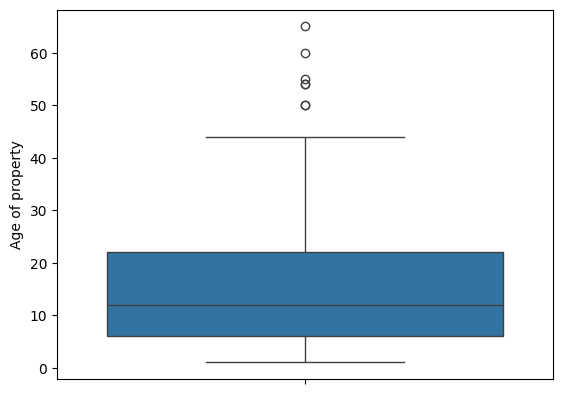

In [6]:
sns.boxplot(df['Age of property'])

In [7]:
# Step 1: Calculate the first and third quartile
Q1 = df['Age of property'].quantile(0.25, interpolation='nearest')
Q2=df['Age of property'].quantile(0.5,interpolation='nearest')
Q3= df['Age of property'].quantile(0.75,interpolation='nearest')

# Step 2 Calculate the IQR
IQR = Q3 - Q1

# Step 3 Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"here are the lower bound and uper bound {lower_bound} {upper_bound}" )
# Step 4 Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {df[(df['Age of property'] < lower_bound) | (df['Age of property'] > upper_bound)]}")
print("----------------------------------------")
# Step 5 Remove the outliers
df['Age of property'] = df['Age of property'].apply(lambda x: Q2 if x <lower_bound or x>upper_bound else x)

# Step 6 Print the data without outliers
print(f"Here is the data without outliers:\n {df}")

here are the lower bound and uper bound -18.0 46.0
Here are the outliers based on the IQR threshold:
           Location  Area  Age of property Property Category Property Type  \
68     Tanga Stand   2.0             55.0        Commercial          Shop   
69     Tanga Stand   5.5             60.0        Commercial          Shop   
94          Ambore  15.0             54.0               NaN           NaN   
111         Ambore  15.0             54.0               NaN           NaN   
148  Central Plate   7.0             50.0       Residential         House   
150  Central Plate   4.0             65.0       Residential         House   
152  Central Plate  10.0             50.0        Commercial  Geuest House   

     No of floors  No of rooms  No of Kitchen  No of Washrooms Lawn Available  \
68            1.0          1.0            0.0              0.0             No   
69            1.0          1.0            0.0              0.0             No   
94            2.0         15.0        

removing outlier from no of row column

In [8]:
# Step 1: Calculate the first and third quartile
Q1 = df['No of floors'].quantile(0.25, interpolation='nearest')
Q2=df['No of floors'].quantile(0.5,interpolation='nearest')
Q3= df['No of floors'].quantile(0.75,interpolation='nearest')

# Step 2 Calculate the IQR
IQR = Q3 - Q1

# Step 3 Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"here are the lower bound and uper bound {lower_bound} {upper_bound}" )
# Step 4 Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {df[(df['No of floors'] < lower_bound) | (df['No of floors'] > upper_bound)]}")
print("----------------------------------------")
# Step 5 Remove the outliers
df['No of floors'] = df['No of floors'].apply(lambda x: Q2 if x <lower_bound or x>upper_bound else x)

# Step 6 Print the data without outliers
print(f"Here is the data without outliers:\n {df}")

here are the lower bound and uper bound -0.5 3.5
Here are the outliers based on the IQR threshold:
           Location  Area  Age of property Property Category Property Type  \
3      Lower Plate  15.5              3.0        Commercial         Plaza   
5      Lower Plate   4.4             22.0        Commercial         Plaza   
6      Lower Plate  10.5             24.0        Commercial         Plaza   
7      Lower Plate  17.0              4.0        Commercial         Plaza   
8      Lower Plate  20.0             15.0        Commercial         Hotel   
11     Lower Plate  14.0              NaN        Commercial         Plaza   
14     Lower Plate  13.0              4.0        Commercial         Plaza   
66     Tanga Stand  16.0             23.0        Commercial         Plaza   
152  Central Plate  10.0             12.0        Commercial  Geuest House   

     No of floors  No of rooms  No of Kitchen  No of Washrooms Lawn Available  \
3             5.0          NaN            NaN   

removing outlier from no of Rooms column

In [9]:
# Step 1: Calculate the first and third quartile
Q1 = df['No of rooms'].quantile(0.25, interpolation='nearest')
Q2=df['No of rooms'].quantile(0.5,interpolation='nearest')
Q3= df['No of rooms'].quantile(0.75,interpolation='nearest')

# Step 2 Calculate the IQR
IQR = Q3 - Q1

# Step 3 Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"here are the lower bound and uper bound {lower_bound} {upper_bound}" )
# Step 4 Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {df[(df['No of rooms'] < lower_bound) | (df['No of rooms'] > upper_bound)]}")
print("----------------------------------------")
# Step 5 Remove the outliers
df['No of rooms'] = df['No of rooms'].apply(lambda x: Q2 if x <lower_bound or x>upper_bound else x)

# Step 6 Print the data without outliers
print(f"Here is the data without outliers:\n {df}")

here are the lower bound and uper bound -3.0 13.0
Here are the outliers based on the IQR threshold:
           Location  Area  Age of property Property Category Property Type  \
6      Lower Plate  10.5             24.0        Commercial         Plaza   
66     Tanga Stand  16.0             23.0        Commercial         Plaza   
94          Ambore  15.0             12.0               NaN           NaN   
152  Central Plate  10.0             12.0        Commercial  Geuest House   
153  Central Plate  15.0             15.0        Commercial       Hostel    
186       Airport   12.0             15.0       Residential         House   
196       Airport   20.0             15.0       Residential         House   

     No of floors  No of rooms  No of Kitchen  No of Washrooms Lawn Available  \
6             2.0         18.0            1.0             18.0             No   
66            2.0         29.0            8.0             16.0             No   
94            2.0         15.0         

removing outlier from no of Kitchen column

In [10]:
# Step 1: Calculate the first and third quartile
Q1 = df['No of Kitchen'].quantile(0.25, interpolation='nearest')
Q2=df['No of Kitchen'].quantile(0.5,interpolation='nearest')
Q3= df['No of Kitchen'].quantile(0.75,interpolation='nearest')

# Step 2 Calculate the IQR
IQR = Q3 - Q1

# Step 3 Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"here are the lower bound and uper bound {lower_bound} {upper_bound}" )
# Step 4 Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {df[(df['No of Kitchen'] < lower_bound) | (df['No of Kitchen'] > upper_bound)]}")
print("----------------------------------------")
# Step 5 Remove the outliers
df['No of Kitchen'] = df['No of Kitchen'].apply(lambda x: Q2 if x <lower_bound or x>upper_bound else x)

# Step 6 Print the data without outliers
print(f"Here is the data without outliers:\n {df}")

here are the lower bound and uper bound -0.5 3.5
Here are the outliers based on the IQR threshold:
         Location  Area  Age of property Property Category Property Type  \
66   Tanga Stand  16.0             23.0        Commercial         Plaza   
120    Jalalabad  12.0             10.0               NaN           NaN   
186     Airport   12.0             15.0       Residential         House   

     No of floors  No of rooms  No of Kitchen  No of Washrooms Lawn Available  \
66            2.0          5.0            8.0             16.0             No   
120           2.0          8.0            4.0              5.0             No   
186           2.0          5.0            4.0              5.0            Yes   

    Parking Available  Parking Capacity Main Road Balcony Furnished  \
66                Yes               NaN        No     Yes       NaN   
120                No               NaN       NaN     Yes       NaN   
186               Yes               NaN       Yes     Yes    

removing outlyer from no of Washrooms

In [11]:
# Step 1: Calculate the first and third quartile
Q1 = df['No of Washrooms'].quantile(0.25, interpolation='nearest')
Q2=df['No of Washrooms'].quantile(0.5,interpolation='nearest')
Q3= df['No of Washrooms'].quantile(0.75,interpolation='nearest')

# Step 2 Calculate the IQR
IQR = Q3 - Q1

# Step 3 Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"here are the lower bound and uper bound {lower_bound} {upper_bound}" )
# Step 4 Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {df[(df['No of Washrooms'] < lower_bound) | (df['No of Washrooms'] > upper_bound)]}")
print("----------------------------------------")
# Step 5 Remove the outliers
df['No of Washrooms'] = df['No of Washrooms'].apply(lambda x: Q2 if x <lower_bound or x>upper_bound else x)

# Step 6 Print the data without outliers
print(f"Here is the data without outliers:\n {df}")

here are the lower bound and uper bound -1.0 7.0
Here are the outliers based on the IQR threshold:
           Location   Area  Age of property Property Category Property Type  \
5      Lower Plate    4.4             22.0        Commercial         Plaza   
6      Lower Plate   10.5             24.0        Commercial         Plaza   
8      Lower Plate   20.0             15.0        Commercial         Hotel   
21   Central Plate    8.0              4.0       Residential         House   
46       Bank Road  110.0              6.0               NaN           NaN   
66     Tanga Stand   16.0             23.0        Commercial         Plaza   
140        Chattar   15.0             12.0               NaN           NaN   
152  Central Plate   10.0             12.0        Commercial  Geuest House   

     No of floors  No of rooms  No of Kitchen  No of Washrooms Lawn Available  \
5             2.0         12.0            1.0             12.0             No   
6             2.0          5.0     

Sale Price outlyer removing

In [12]:
# Step 1: Calculate the first and third quartile
Q1 = df['Sale Price'].quantile(0.25, interpolation='nearest')
Q2=df['Sale Price'].quantile(0.5,interpolation='nearest')
Q3= df['Sale Price'].quantile(0.75,interpolation='nearest')

# Step 2 Calculate the IQR
IQR = Q3 - Q1

# Step 3 Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"here are the lower bound and uper bound {lower_bound} {upper_bound}" )
# Step 4 Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {df[(df['Sale Price'] < lower_bound) | (df['Sale Price'] > upper_bound)]}")
print("----------------------------------------")
# Step 5 Remove the outliers
df['Sale Price'] = df['Sale Price'].apply(lambda x: Q2 if x <lower_bound or x>upper_bound else x)

# Step 6 Print the data without outliers
print(f"Here is the data without outliers:\n {df}")

here are the lower bound and uper bound -10.0 38.0
Here are the outliers based on the IQR threshold:
           Location   Area  Age of property Property Category Property Type  \
2      Lower Plate    5.0             35.0        Commercial    Guest Room   
3      Lower Plate   15.5              3.0        Commercial         Plaza   
4      Lower Plate   14.4              7.0        Commercial         Plaza   
5      Lower Plate    4.4             22.0        Commercial         Plaza   
6      Lower Plate   10.5             24.0        Commercial         Plaza   
7      Lower Plate   17.0              4.0        Commercial         Plaza   
8      Lower Plate   20.0             15.0        Commercial         Hotel   
10     Lower Plate    6.0             22.0        Commercial         Plaza   
11     Lower Plate   14.0              NaN        Commercial         Plaza   
12     Lower Plate   10.0             22.0        Commercial         Plaza   
13     Lower Plate    6.0             22

removing outlyer from Rental Price

In [13]:
# Step 1: Calculate the first and third quartile
Q1 = df['Rental Price'].quantile(0.25, interpolation='nearest')
Q2=df['Rental Price'].quantile(0.5,interpolation='nearest')
Q3= df['Rental Price'].quantile(0.75,interpolation='nearest')

# Step 2 Calculate the IQR
IQR = Q3 - Q1

# Step 3 Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"here are the lower bound and uper bound {lower_bound} {upper_bound}" )
# Step 4 Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {df[(df['Rental Price'] < lower_bound) | (df['Rental Price'] > upper_bound)]}")
print("----------------------------------------")
# Step 5 Remove the outliers
df['Rental Price'] = df['Rental Price'].apply(lambda x: Q2 if x <lower_bound or x>upper_bound else x)

# Step 6 Print the data without outliers
print(f"Here is the data without outliers:\n {df}")

here are the lower bound and uper bound -0.022500000000000003 0.08549999999999999
Here are the outliers based on the IQR threshold:
             Location   Area  Age of property Property Category Property Type  \
1        Lower Plate    4.5             35.0        Commercial         Hotel   
3        Lower Plate   15.5              3.0        Commercial         Plaza   
4        Lower Plate   14.4              7.0        Commercial         Plaza   
5        Lower Plate    4.4             22.0        Commercial         Plaza   
6        Lower Plate   10.5             24.0        Commercial         Plaza   
7        Lower Plate   17.0              4.0        Commercial         Plaza   
8        Lower Plate   20.0             15.0        Commercial         Hotel   
9        Lower Plate    3.0             22.0        Commercial         Plaza   
10       Lower Plate    6.0             22.0        Commercial         Plaza   
11       Lower Plate   14.0              NaN        Commercial     

Missing Vlaues

In [14]:
# check the missing values
df.isnull().sum().sort_values(ascending=False)

Parking Capacity      197
Furnished             118
Main Road             108
Property Category     101
Property Type         101
Lawn Available         28
Property Condition     22
No of Kitchen          22
Age of property        17
No of Washrooms        17
No of rooms            17
Rental Price           11
Sale Price              8
No of floors            1
Balcony                 1
Location                0
Area                    0
Parking Available       0
dtype: int64

In [15]:
df.columns

Index(['Location', 'Area', 'Age of property', 'Property Category',
       'Property Type', 'No of floors', 'No of rooms', 'No of Kitchen',
       'No of Washrooms', 'Lawn Available', 'Parking Available',
       'Parking Capacity', 'Main Road', 'Balcony', 'Furnished',
       'Property Condition', 'Sale Price', 'Rental Price'],
      dtype='object')

In [25]:
d.kill()

2025-01-06 21:16:23,732 - INFO     - Executing shutdown...
C:\Users\Admin\anaconda3\lib\site-packages\dtale\app.py:451: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



In [27]:
d = dtale.show(df)

C:\Users\Admin\anaconda3\lib\site-packages\dtale\views.py:817: FutureWarning:

['Property Category', 'Property Type', 'Lawn Available', 'Main Road', 'Balcony', 'Furnished', 'Property Condition'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



In [28]:
d.open_browser()

C:\Users\Admin\anaconda3\lib\site-packages\dtale\views.py:2193: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Admin\anaconda3\lib\site-packages\dtale\views.py:2193: FutureWarning:

The default value of regex will change from True to False in a future version.



In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Imputer for numerical columns
numerical_imputer = IterativeImputer(max_iter=10)

# Imputer for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Columns for numeric imputation
numerical_columns = ['Age of property', 'No of floors', 'No of rooms', 
                     'No of Kitchen', 'No of Washrooms', 'Sale Price', 
                     'Rental Price']

# Columns for categorical imputation
categorical_columns = ['Furnished', 'Property Type', 'Lawn Available', 
                       'Parking Capacity', 'Main Road', 'Balcony', 
                       'Property Condition', 'Parking Available',
                      'Property Category']

for col in categorical_columns:
    df[[col]] = categorical_imputer.fit_transform(df[[col]]) 
    
df.head()

,Location,Area,Age of property,Property Category,Property Type,No of floors,No of rooms,No of Kitchen,No of Washrooms,Lawn Available,Parking Available,Parking Capacity,Main Road,Balcony,Furnished,Property Condition,Sale Price,Rental Price
0,Lower Plate,1.0,19.0,Commercial,Shop,1.0,NaN,NaN,NaN,No,Yes,1.0,Yes,No,No,Good,9.0,0.014
1,Lower Plate,4.5,35.0,Commercial,Hotel,1.0,NaN,1.0,1.0,No,No,1.0,Yes,No,No,Excellent,37.0,0.025
2,Lower Plate,5.0,35.0,Commercial,Guest Room,1.0,6.0,NaN,6.0,No,Yes,3.0,Yes,No,No,Excellent,12.5,0.050
3,Lower Plate,15.5,3.0,Commercial,Plaza,2.0,NaN,NaN,NaN,No,Yes,10.0,Yes,No,No,Excellent,12.5,0.025
4,Lower Plate,14.4,7.0,Commercial,Plaza,3.0,NaN,NaN,NaN,No,Yes,5.0,Yes,No,No,Excellent,12.5,0.025


In [30]:
d.kill()

2025-01-06 21:18:58,279 - INFO     - Executing shutdown...
C:\Users\Admin\anaconda3\lib\site-packages\dtale\app.py:451: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



In [32]:
d = dtale.show(df)

In [33]:
d.open_browser()

C:\Users\Admin\anaconda3\lib\site-packages\dtale\views.py:2193: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Admin\anaconda3\lib\site-packages\dtale\views.py:2193: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Admin\anaconda3\lib\site-packages\dtale\views.py:2193: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Admin\anaconda3\lib\site-packages\dtale\views.py:2193: FutureWarning:

The default value of regex will change from True to False in a future version.



In [18]:
# Dictionary to store LabelEncoders for each column
label_encoders = {}

# Apply LabelEncoder to categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df.head()

,Location,Area,Age of property,Property Category,Property Type,No of floors,No of rooms,No of Kitchen,No of Washrooms,Lawn Available,Parking Available,Parking Capacity,Main Road,Balcony,Furnished,Property Condition,Sale Price,Rental Price
0,Lower Plate,1.0,19.0,0,11,1.0,NaN,NaN,NaN,0,1,0,1,0,0,3,9.0,0.014
1,Lower Plate,4.5,35.0,0,6,1.0,NaN,1.0,1.0,0,0,0,1,0,0,0,37.0,0.025
2,Lower Plate,5.0,35.0,0,3,1.0,6.0,NaN,6.0,0,1,2,1,0,0,0,12.5,0.050
3,Lower Plate,15.5,3.0,0,9,2.0,NaN,NaN,NaN,0,1,5,1,0,0,0,12.5,0.025
4,Lower Plate,14.4,7.0,0,9,3.0,NaN,NaN,NaN,0,1,3,1,0,0,0,12.5,0.025


In [19]:

# Loop to impute each column
for col in numerical_columns:
    df[col] = numerical_imputer.fit_transform(df[[col]])   
      
 
# check the missing values
df.isnull().sum().sort_values(ascending=False)

Location              0
Area                  0
Age of property       0
Property Category     0
Property Type         0
No of floors          0
No of rooms           0
No of Kitchen         0
No of Washrooms       0
Lawn Available        0
Parking Available     0
Parking Capacity      0
Main Road             0
Balcony               0
Furnished             0
Property Condition    0
Sale Price            0
Rental Price          0
dtype: int64

In [20]:
# Inverse transform for encoded columns
for col in categorical_columns:
    # Retrieve the corresponding LabelEncoder for the column
    le = label_encoders[col]
    # Inverse transform the data and convert to integer type
    df[col] = le.inverse_transform(df[col].astype(int))
df.head()

,Location,Area,Age of property,Property Category,Property Type,No of floors,No of rooms,No of Kitchen,No of Washrooms,Lawn Available,Parking Available,Parking Capacity,Main Road,Balcony,Furnished,Property Condition,Sale Price,Rental Price
0,Lower Plate,1.0,19.0,Commercial,Shop,1.0,5.153439,1.369565,2.925926,No,Yes,1.0,Yes,No,No,Good,9.0,0.014
1,Lower Plate,4.5,35.0,Commercial,Hotel,1.0,5.153439,1.000000,1.000000,No,No,1.0,Yes,No,No,Excellent,37.0,0.025
2,Lower Plate,5.0,35.0,Commercial,Guest Room,1.0,6.000000,1.369565,6.000000,No,Yes,3.0,Yes,No,No,Excellent,12.5,0.050
3,Lower Plate,15.5,3.0,Commercial,Plaza,2.0,5.153439,1.369565,2.925926,No,Yes,10.0,Yes,No,No,Excellent,12.5,0.025
4,Lower Plate,14.4,7.0,Commercial,Plaza,3.0,5.153439,1.369565,2.925926,No,Yes,5.0,Yes,No,No,Excellent,12.5,0.025


In [21]:
df.to_excel("Preprocessed_Data_of_House_pricing.xlsx")

In [22]:
# check the missing values
df.isnull().sum().sort_values(ascending=False)

Location              0
Area                  0
Age of property       0
Property Category     0
Property Type         0
No of floors          0
No of rooms           0
No of Kitchen         0
No of Washrooms       0
Lawn Available        0
Parking Available     0
Parking Capacity      0
Main Road             0
Balcony               0
Furnished             0
Property Condition    0
Sale Price            0
Rental Price          0
dtype: int64

Part 1: Central Tendency

In [23]:
# Central Tendency
# 1. Mean, Median, Mode for Sale Price and Rental Price
sale_price_mean = df['Sale Price'].mean()
sale_price_median = df['Sale Price'].median()
sale_price_mode = df['Sale Price'].mode()[0]

rental_price_mean = df['Rental Price'].mean()
rental_price_median = df['Rental Price'].median()
rental_price_mode = df['Rental Price'].mode()[0]

print(f"Sale Price - Mean: {sale_price_mean}, Median: {sale_price_median}, Mode: {sale_price_mode}")
print(f"Rental Price - Mean: {rental_price_mean}, Median: {rental_price_median}, Mode: {rental_price_mode}")

Sale Price - Mean: 13.3439898989899, Median: 12.5, Mode: 12.5
Rental Price - Mean: 0.02664102564102564, Median: 0.025, Mode: 0.02


In [24]:
# 2. Average number of rooms by location
average_rooms_by_location = df.groupby('Location')['No of rooms'].mean()
print("\nAverage Rooms by Location:")
print(average_rooms_by_location)


Average Rooms by Location:
Location
Airport             5.291667
Ambore              5.111111
Babu Muhala        10.000000
Balapeer            3.000000
Bank Road           5.461376
Bella Noor Shah     6.300000
Central Plate       4.652796
Chattar             5.000000
Chehlla             4.596120
Domail              3.250000
Gojra               5.464286
Jalalabad           5.666667
Khawaja Muhala      7.000000
Langarpura          5.000000
Lohargali           5.000000
Lower Plate         5.777484
Madina Market       8.000000
Naloochi            8.000000
New Muhala          6.000000
Qureshi Muhala      6.000000
Sama Bandi          7.000000
Sathi Bagh         10.000000
Tanga Stand         3.578947
Tariqabad           5.571429
Waba Kaloni         6.000000
Name: No of rooms, dtype: float64


In [25]:
# 3. Most common house condition and its relation to price
most_common_condition = df['Property Condition'].mode()[0]
condition_price_comparison = df.groupby('Property Condition')[['Sale Price', 'Rental Price']].mean()
print(f"\nMost Common House Condition: {most_common_condition}")
print("\nAverage Prices by House Condition:")
print(condition_price_comparison)


Most Common House Condition: Good

Average Prices by House Condition:
                    Sale Price  Rental Price
Property Condition                          
Excellent            13.624000      0.031795
Excellent            11.916667      0.029167
Fair                 10.305418      0.025476
Good                 14.798333      0.025613
Good                 22.000000      0.040000
Poor                 14.500000      0.025000
fair                 10.000000      0.020000


Part 2: Dispersion

In [26]:
# 1. Variability in Sale Price by location
location_price_variability = df.groupby('Location')['Sale Price'].agg(['mean', 'std', 'min', 'max'])
print("\nSale Price Variability by Location:")
print(location_price_variability)


Sale Price Variability by Location:
                      mean        std    min       max
Location                                              
Airport           8.270833   4.532441   2.50  20.00000
Ambore           11.222222   7.446103   7.00  30.00000
Babu Muhala      28.000000        NaN  28.00  28.00000
Balapeer          9.000000        NaN   9.00   9.00000
Bank Road        13.788798  11.671197   1.10  32.50000
Bella Noor Shah  12.334399   6.771575   7.00  30.00000
Central Plate    14.396972   6.321326   6.00  33.00000
Chattar          11.906250   4.021686   8.00  23.00000
Chehlla          13.625000   7.708098   7.00  35.00000
Domail            7.963497   5.436083   0.51  13.34399
Gojra            14.530142   7.002145   5.00  35.00000
Jalalabad        14.666667   5.507571   9.00  20.00000
Khawaja Muhala   36.000000        NaN  36.00  36.00000
Langarpura       15.000000        NaN  15.00  15.00000
Lohargali        20.000000        NaN  20.00  20.00000
Lower Plate      16.333333  

In [45]:
# 2. Variability in Rental Price by location
location_rent_variability = df.groupby('Location')['Rental Price'].agg(['mean', 'std', 'min', 'max'])
print("\nRental Price Variability by Location:")
print(location_rent_variability)


Rental Price Variability by Location:
                     mean       std    min    max
Location                                         
Airport          0.019917  0.013682  0.008  0.060
Ambore           0.022778  0.012019  0.010  0.040
Babu Muhala      0.050000       NaN  0.050  0.050
Balapeer         0.020000       NaN  0.020  0.020
Bank Road        0.027985  0.003986  0.025  0.035
Bella Noor Shah  0.026700  0.014182  0.010  0.060
Central Plate    0.032936  0.015640  0.010  0.080
Chattar          0.021495  0.008143  0.010  0.040
Chehlla          0.028220  0.017049  0.012  0.065
Domail           0.024160  0.018929  0.010  0.050
Gojra            0.025367  0.011622  0.003  0.050
Jalalabad        0.025000  0.015000  0.010  0.040
Khawaja Muhala   0.030000       NaN  0.030  0.030
Langarpura       0.010000       NaN  0.010  0.010
Lohargali        0.030000       NaN  0.030  0.030
Lower Plate      0.025778  0.006576  0.014  0.050
Madina Market    0.019000  0.015556  0.008  0.030
Naloochi   

In [27]:
# 3. Effect of gardens on Sale Price consistency
garden_price_variability = df.groupby('Lawn Available')['Sale Price'].agg(['mean', 'std'])
print("\nSale Price Variability with/without Garden:")
print(garden_price_variability)


Sale Price Variability with/without Garden:
                     mean       std
Lawn Available                     
No              12.891816  6.806160
Yes             13.974930  7.715246


Part 3: Correlation


In [28]:
# 1. Correlation between Area and Sale Price
area_price_correlation = df['Area'].corr(df['Sale Price'])
print(f"\nCorrelation between Area and Sale Price: {area_price_correlation}")


Correlation between Area and Sale Price: 0.1983841329501646


In [29]:
# 2. Correlation: No of Rooms vs Rental Price, No of Washrooms vs Rental Price
rooms_rent_correlation = df['No of rooms'].corr(df['Rental Price'])
washrooms_rent_correlation = df['No of Washrooms'].corr(df['Rental Price'])
print(f"\nCorrelation between No of Rooms and Rental Price: {rooms_rent_correlation}")
print(f"Correlation between No of Washrooms and Rental Price: {washrooms_rent_correlation}")


Correlation between No of Rooms and Rental Price: 0.14092906081978793
Correlation between No of Washrooms and Rental Price: 0.2701301700484182


In [30]:
# 3. Correlation between Year of Construction and Sale Price
year_price_correlation = df['Age of property'].corr(df['Sale Price'])
print(f"\nCorrelation between Year of Construction and Sale Price: {year_price_correlation}")


Correlation between Year of Construction and Sale Price: 0.0223963433611329


Linear Regression

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression

In [32]:
data_frame = pd.read_excel('C:\\Users\\Admin\\Downloads\\Preprocessed_Data_of_House_pricing.xlsx')

In [33]:
data_frame.head()

,Unnamed: 0,Location,Area,Age of property,Property Category,Property Type,No of floors,No of rooms,No of Kitchen,No of Washrooms,...,Balcony,Furnished,Property Condition,Construction Category,Sale Price,Rental Price,Price Predicted by Dealer (Million),Unnamed: 20,Unnamed: 21,Unnamed: 22
0,0,Lower Plate,1.0,19.0,Commercial,Shop,1.0,4.925926,1.369565,2.925926,...,No,No,Good,NaN,9.0,0.014,NaN,NaN,NaN,NaN
1,1,Lower Plate,4.5,35.0,Commercial,Hotel,1.0,4.925926,1.000000,1.000000,...,No,No,Excellent,NaN,12.5,0.025,NaN,NaN,NaN,NaN
2,2,Lower Plate,5.0,35.0,Commercial,Guest Room,1.0,6.000000,1.369565,6.000000,...,No,No,Excellent,NaN,12.5,0.025,NaN,NaN,NaN,NaN
3,3,Lower Plate,15.5,3.0,Commercial,Plaza,2.0,4.925926,1.369565,2.925926,...,No,No,Excellent,NaN,12.5,0.025,NaN,NaN,NaN,NaN
4,4,Lower Plate,14.4,7.0,Commercial,Plaza,3.0,4.925926,1.369565,2.925926,...,No,No,Excellent,NaN,12.5,0.025,NaN,NaN,NaN,NaN


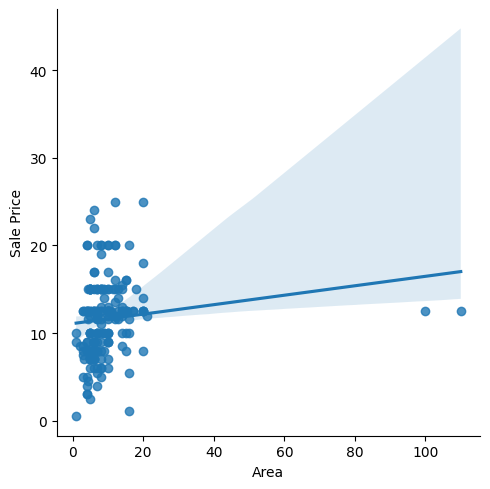

In [34]:
sns.lmplot(x='Area', y='Sale Price', data = data_frame)

In [36]:
# preprocess the data
scalar = StandardScaler()
data_frame[['Area', 'Sale Price']] = scalar.fit_transform(data_frame[['Area', 'Sale Price']])
data_frame.head()

,Unnamed: 0,Location,Area,Age of property,Property Category,Property Type,No of floors,No of rooms,No of Kitchen,No of Washrooms,...,Balcony,Furnished,Property Condition,Construction Category,Sale Price,Rental Price,Price Predicted by Dealer (Million),Unnamed: 20,Unnamed: 21,Unnamed: 22
0,0,Lower Plate,-0.816397,19.0,Commercial,Shop,1.0,4.925926,1.369565,2.925926,...,No,No,Good,NaN,-0.608430,0.014,NaN,NaN,NaN,NaN
1,1,Lower Plate,-0.481401,35.0,Commercial,Hotel,1.0,4.925926,1.000000,1.000000,...,No,No,Excellent,NaN,0.210913,0.025,NaN,NaN,NaN,NaN
2,2,Lower Plate,-0.433544,35.0,Commercial,Guest Room,1.0,6.000000,1.369565,6.000000,...,No,No,Excellent,NaN,0.210913,0.025,NaN,NaN,NaN,NaN
3,3,Lower Plate,0.571446,3.0,Commercial,Plaza,2.0,4.925926,1.369565,2.925926,...,No,No,Excellent,NaN,0.210913,0.025,NaN,NaN,NaN,NaN
4,4,Lower Plate,0.466161,7.0,Commercial,Plaza,3.0,4.925926,1.369565,2.925926,...,No,No,Excellent,NaN,0.210913,0.025,NaN,NaN,NaN,NaN


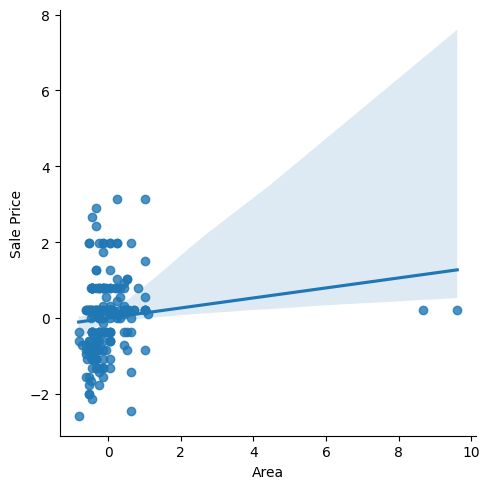

In [37]:
sns.lmplot(x='Area', y='Sale Price', data = data_frame)

In [38]:
# separate the features X and the target/labels y
X = data_frame[['Area']]
y = data_frame['Sale Price']

In [39]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [40]:
# call the model
model = LinearRegression()

In [41]:
# train the model
model.fit(X_train, y_train)

LinearRegression()

In [42]:
model.predict([[15]])

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([1.67736485])

In [43]:
# prediction
y_pred = model.predict(X_test)

In [44]:
# evaluation the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
# root mean squared error
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  0.887851793243971
R2:  -0.09139850323736187
MAPE:  1535363791202.1665
MAE:  0.7253352791917452
RMSE:  0.942258878039348
